### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Loading The Data

In [2]:
df = pd.read_csv(r'C:\Users\Shailesh\Documents\NEw Folder\ML\heart_disease_data.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.value_counts('target')

target
1    165
0    138
dtype: int64

In [7]:
disease = len(df[df['target'] == 1])
no_disease = len(df[df['target'] == 0])

### Visualization

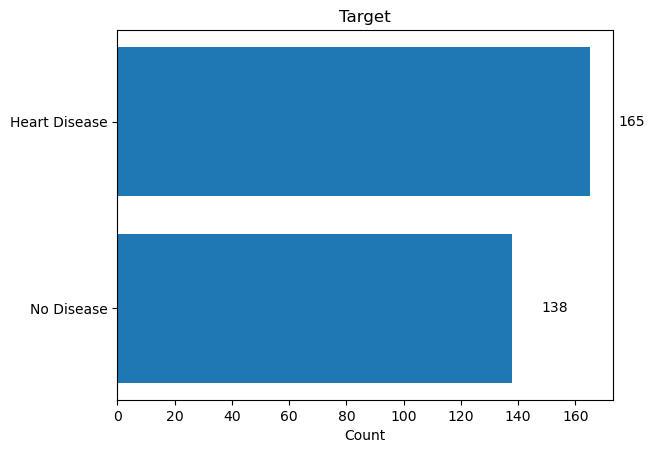

In [8]:
plt.rcdefaults()
fig, ax = plt.subplots()
y = ('Heart Disease', 'No Disease')
y_pos = np.arange(len(y))
x = (disease, no_disease)
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
ax.invert_yaxis() #lables read top to bottom
ax.set_xlabel('Count')
ax.set_title('Target')
for i, v in enumerate(x):
    ax.text(v + 10, i, str(v), color='black', va='center', fontweight='normal')
plt.show()

In [9]:
df.value_counts('target')

target
1    165
0    138
dtype: int64

In [10]:
no_disease

138

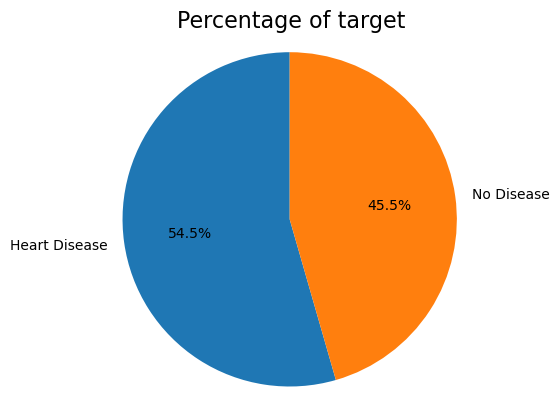

In [11]:
# Pie Chart
y = ('Heart Disease', 'No Disease')
x = (disease, no_disease)
labels = 'Heart Disease', 'No Disease'
sizes = [disease, no_disease]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal') #equal aspect ratio ensures that pie is drawn as a circle
plt.title('Percentage of target', size=16)
plt.show()

In [12]:
qualitative = []
quantitative = []
for feature in df.columns:
    if len(df[feature].unique()) <= 8:
        qualitative.append(feature)
    else:
        quantitative.append(feature)

In [13]:
print(qualitative)
print(quantitative)

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [14]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

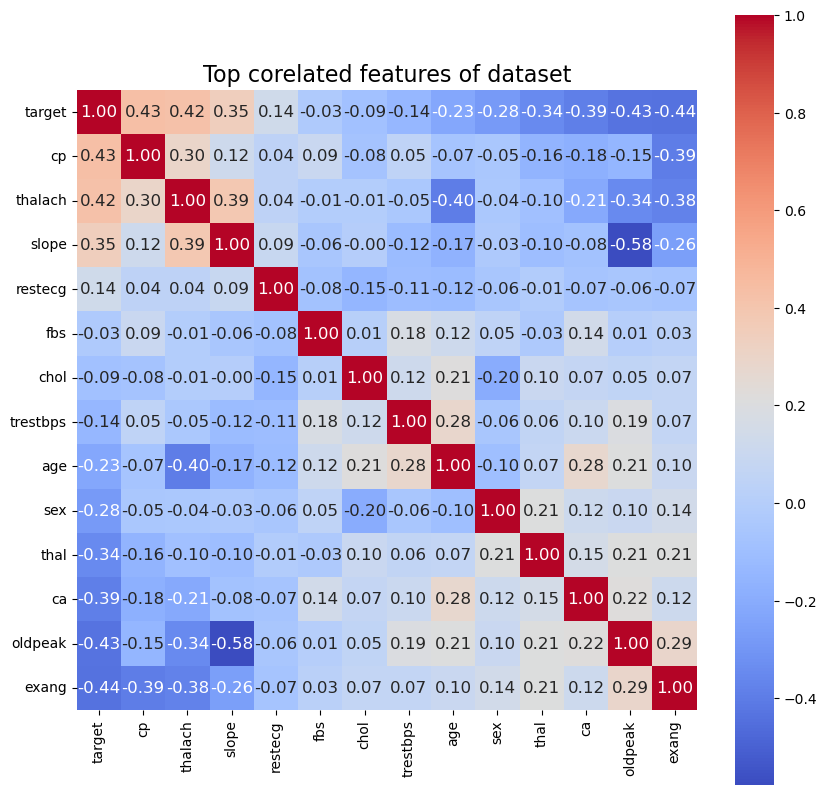

In [15]:
top =15
corr = df.corr()
top15 = corr.nlargest(top, 'target')['target'].index
corr_top15 = df[top15].corr()
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_top15, square=True, ax=ax, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size':12})
plt.title('Top corelated features of dataset', size=16)
plt.show()

thalach and target are highlt corelated

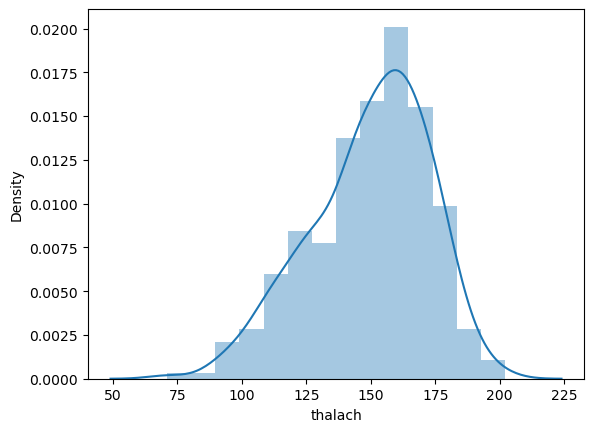

In [16]:
ax = sns.distplot(df['thalach'])

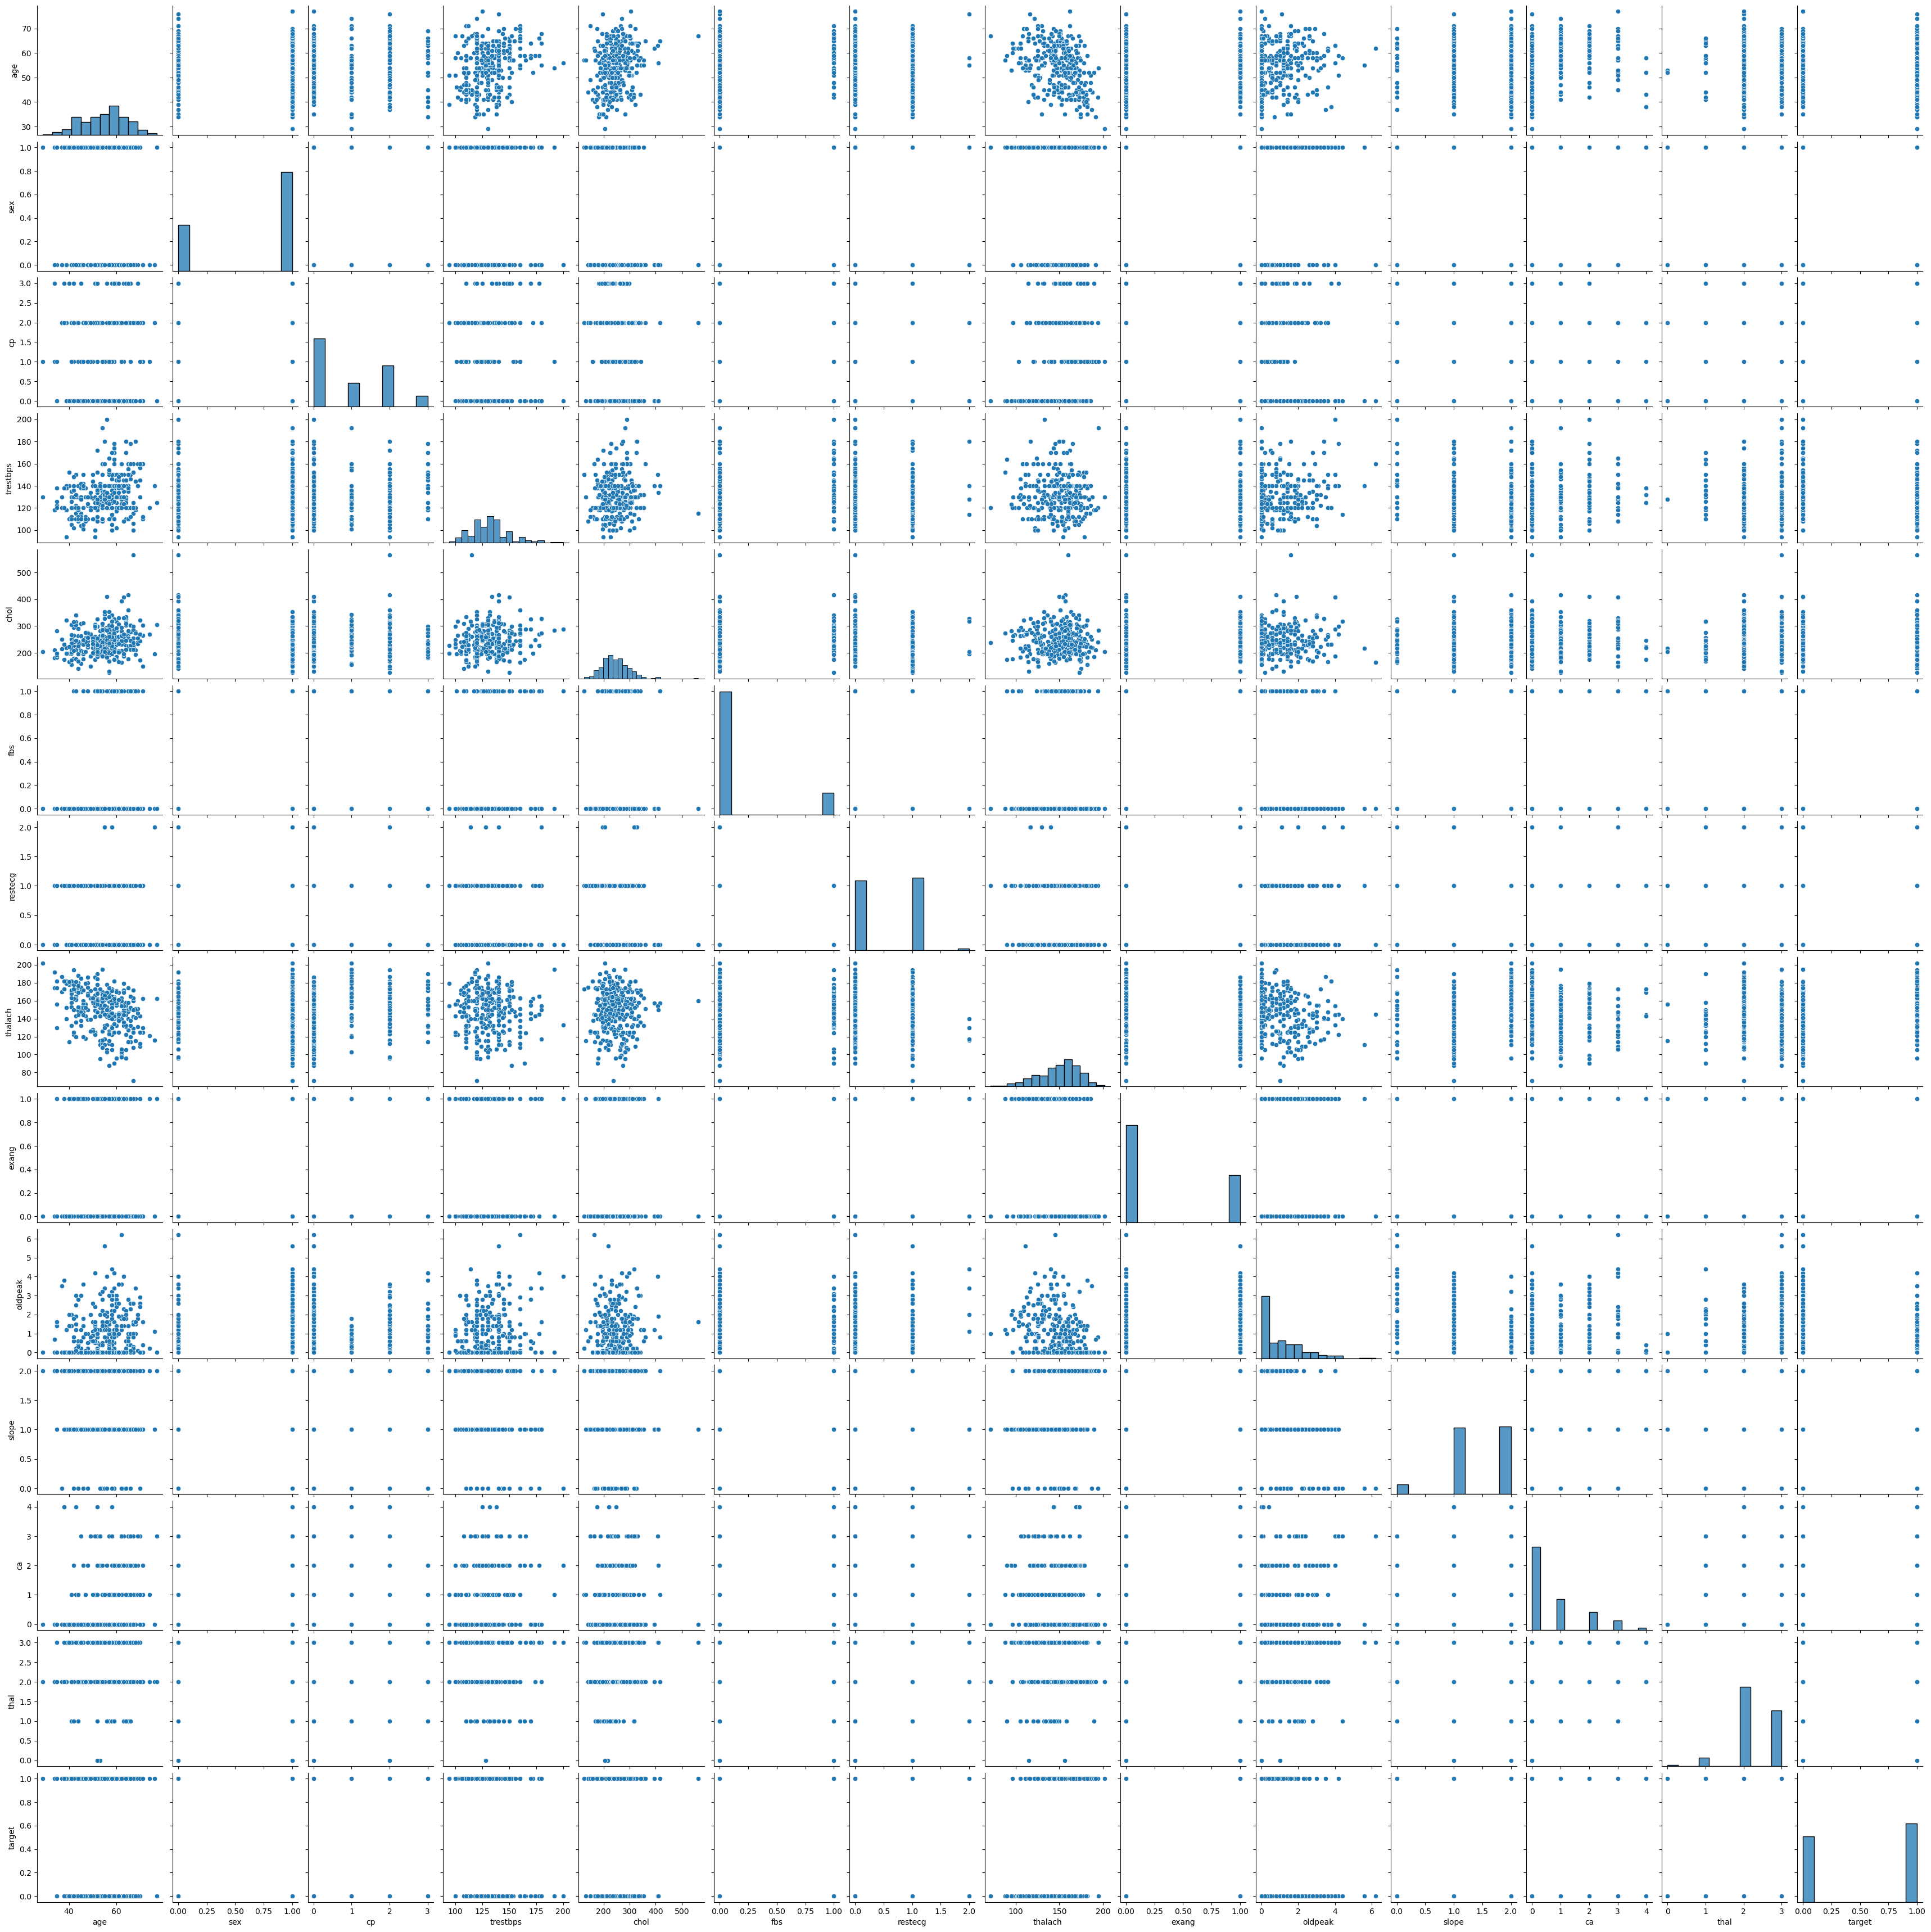

In [17]:
sns.pairplot(df)

In [18]:
X = df.drop('target', axis=1)
Y = df[['target']]
print('Shape of X and Y are respectively :', X.shape, Y.shape)

Shape of X and Y are respectively : (303, 13) (303, 1)


In [19]:
Y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


### Splitting The Data

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print('Shape of X_train and Y_train :' , X_train.shape, Y_train.shape)

Shape of X_train and Y_train : (242, 13) (242, 1)


### Select The model

## Logistic Regression

In [21]:
print('Logistic Regression')
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
score = model.score(X_train, Y_train)
print('Training score :', score)
score = model.score(X_test, Y_test)
print('Testing score :', score)
output = pd.DataFrame({'Predicted': Y_pred}) # Heart disease yes or no 1/0
print(output.head())
people = output.loc[output.Predicted == 1]['Predicted']
rate_people = 0
if len(people) > 0:
    rate_people = len(people)/len(output)
print('% of People prediced with heart disease:', rate_people)
score_logreg = score
out_logreg = output
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

Logistic Regression
Training score : 0.8388429752066116
Testing score : 0.8524590163934426
   Predicted
0          0
1          1
2          1
3          0
4          0
% of People prediced with heart disease: 0.6065573770491803
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



In [22]:
print(output)

    Predicted
0           0
1           1
2           1
3           0
4           0
..        ...
56          1
57          1
58          1
59          1
60          1

[61 rows x 1 columns]


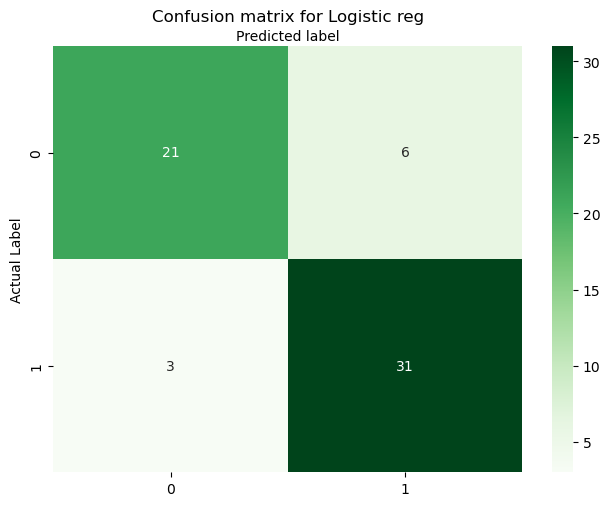

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap='Greens', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Logistic reg')
plt.ylabel('Actual Label')
plt.xlabel('Predicted label')
plt.show()

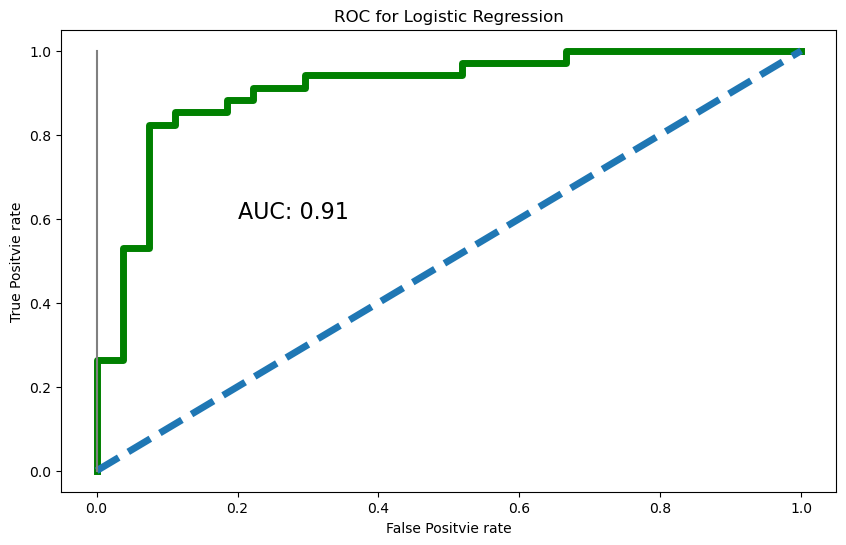

In [24]:
# ROC Curve
from sklearn.metrics import roc_auc_score, roc_curve
y_probablities = model.predict_proba(X_test)[:, 1]
false_positive_rate_knn, true_positive_rate_knn, threshold_knn = roc_curve(Y_test, y_probablities)
plt.figure(figsize=(10,6))
plt.title('ROC for Logistic Regression')
plt.plot(false_positive_rate_knn, true_positive_rate_knn, linewidth=5, color='green')
plt.plot([0,1],ls='--', linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(Y_test, y_probablities)),size=16)
plt.xlabel('False Positvie rate')
plt.ylabel('True Positvie rate')
plt.show()

### Decision Tree Classifier

In [25]:
print('DecisionTreeClassifier')
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, Y_train)
Y_pred = dt.predict(X_test)
score = dt.score(X_train, Y_train)
print('training score: ', score)
score = dt.score(X_test, Y_test)
print('testing score: ', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart disease yes or no
print(output.head())
people = output.loc[output.Predicted == 1]['Predicted']
rate_people = 0
if len(people) > 0:
    rate_people = len(people)/len(output)
print('% of the people predicted with heart disease:', rate_people)
score_dtc = score
out_dtc = output
print(classification_report(Y_test, Y_pred))

DecisionTreeClassifier
training score:  0.9421487603305785
testing score:  0.7704918032786885
   Predicted
0          0
1          1
2          0
3          0
4          0
% of the people predicted with heart disease: 0.5245901639344263
              precision    recall  f1-score   support

           0       0.72      0.78      0.75        27
           1       0.81      0.76      0.79        34

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



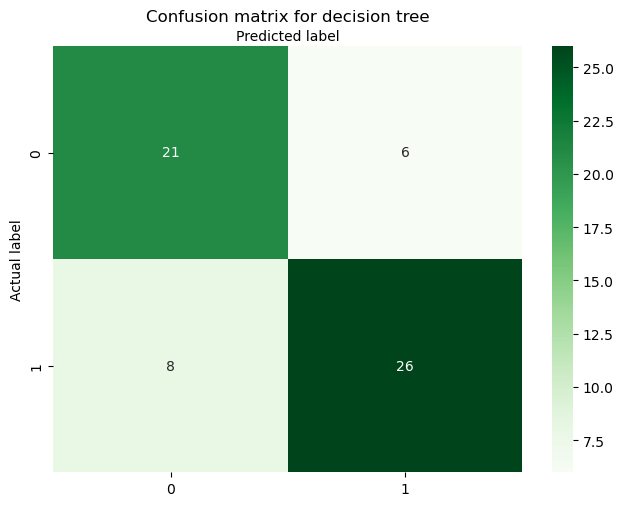

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for decision tree')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

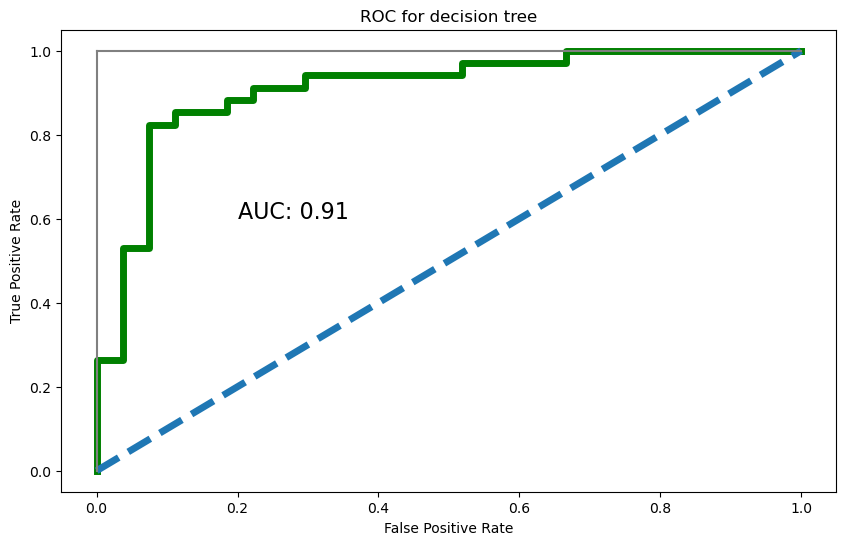

In [27]:
# ROC curve
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = model.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(Y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for decision tree')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(Y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Random Forest Classifier

In [28]:
print('Random Forest Classifier')
from sklearn.ensemble import RandomForestClassifier
Rd = RandomForestClassifier(n_estimators=100) # max_depths = 5, random_state=1
Rd.fit(X_train, Y_train)
Y_pred = Rd.predict(X_test)
score = Rd.score(X_train, Y_train)
print('training score:', score)
score = Rd.score(X_test, Y_test)
print('Testing score:', score)
output = pd.DataFrame({'Predicted': Y_pred})
output.head()
people = output.loc[output.Predicted == 1]['Predicted']
rate_people = 0
if len(people) > 0:
    rate_people = len(people)/len(output)
print('% of people predicted with heart disease:', rate_people)
score_rfc = score
out_rfc = output
print(classification_report(Y_test, Y_pred))

Random Forest Classifier
training score: 1.0
Testing score: 0.8852459016393442
% of people predicted with heart disease: 0.5737704918032787
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



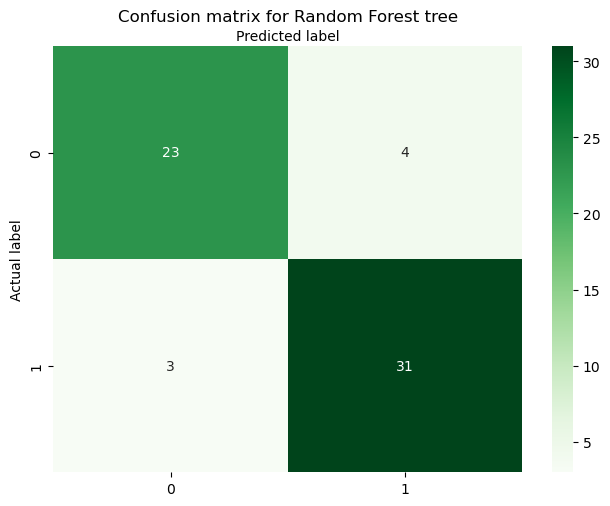

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Random Forest tree')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

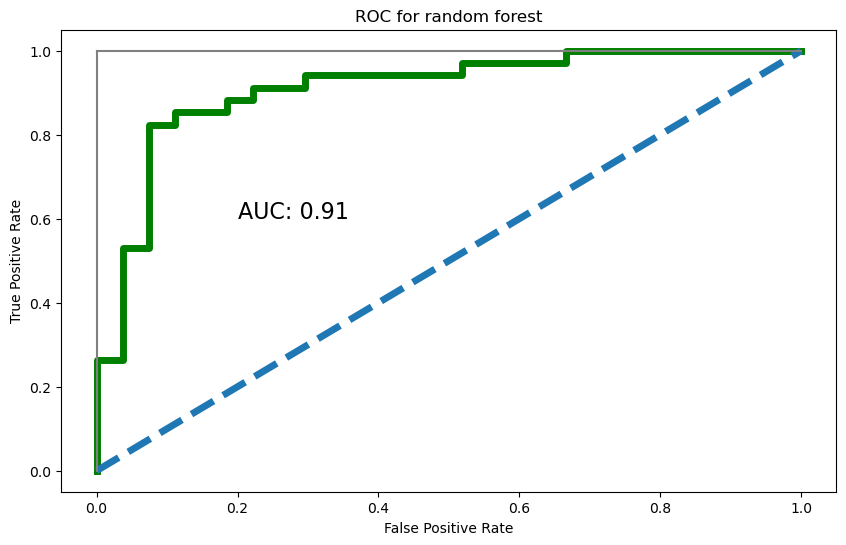

In [30]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = model.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold_knn = roc_curve(Y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for random forest')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(Y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### KNeighbors Classifier

In [31]:
print('KNeighborsClassifier')
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
score = model.score(X_train, Y_train)
print('Training Score:', score_logreg)
score = model.score(X_test, Y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart-disease:", rate_people)
score_knc = score
out_knc = output
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

KNeighborsClassifier
Training Score: 0.8524590163934426
Testing Score: 0.639344262295082
   Predicted
0          0
1          0
2          1
3          0
4          1
% of people predicted with heart-disease: 0.5245901639344263
              precision    recall  f1-score   support

           0       0.59      0.63      0.61        27
           1       0.69      0.65      0.67        34

    accuracy                           0.64        61
   macro avg       0.64      0.64      0.64        61
weighted avg       0.64      0.64      0.64        61



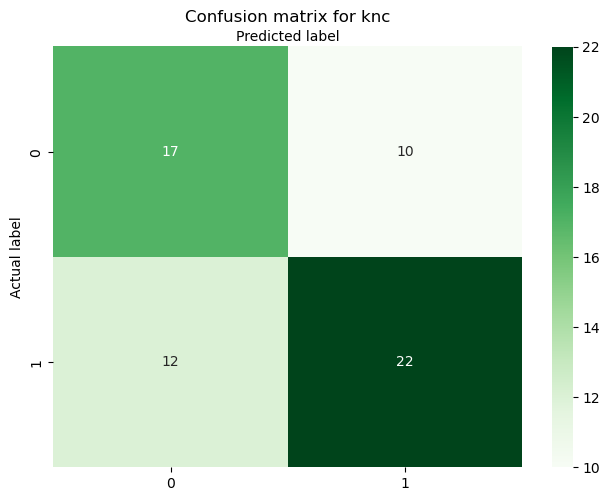

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for knc')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

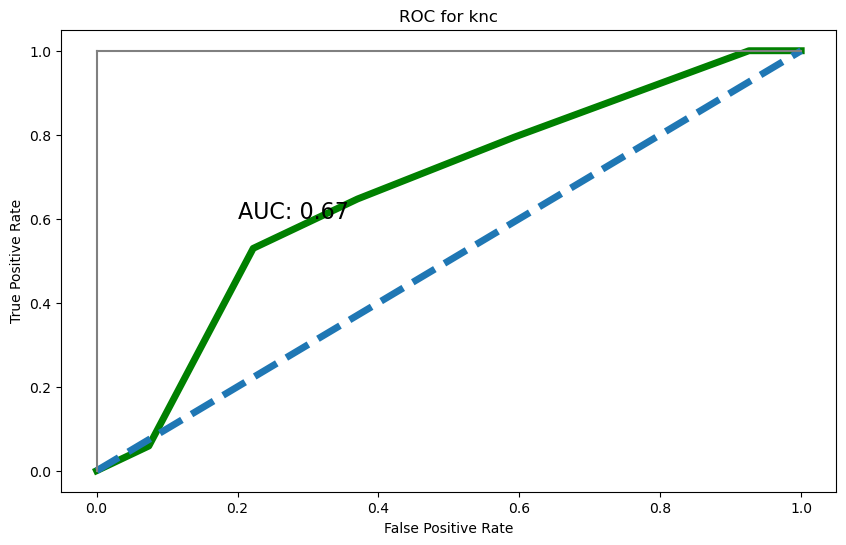

In [33]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = model.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(Y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for knc')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(Y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Conclusion

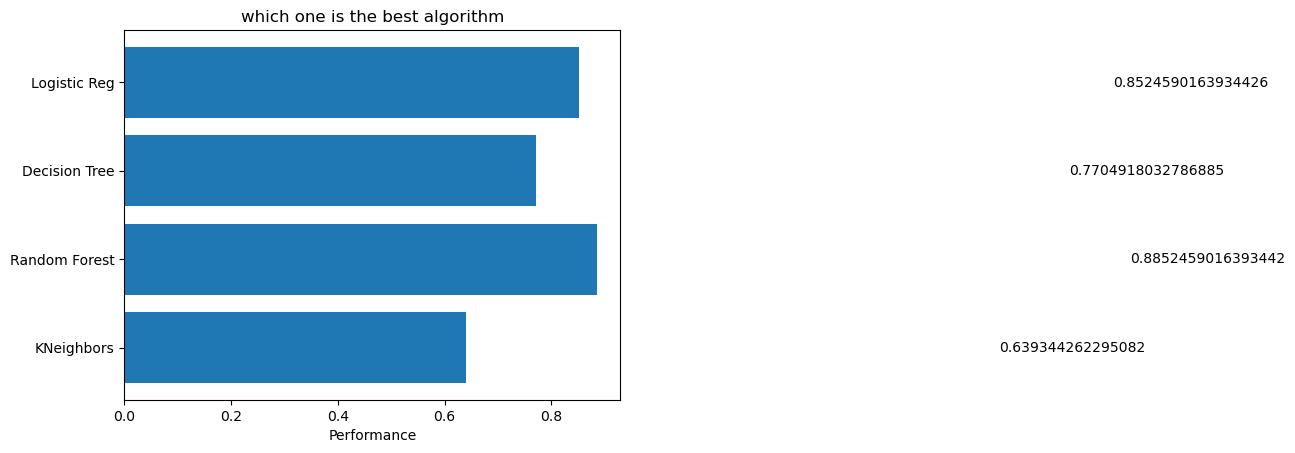

In [34]:
plt.rcdefaults()
fig,ax =plt.subplots()
algorithms = ('Logistic Reg', 'Decision Tree', 'Random Forest', 'KNeighbors')
y_pos = np.arange(len(algorithms))
x = (score_logreg, score_dtc, score_rfc, score_knc)
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(algorithms)
ax.invert_yaxis() # labels top to bottom
ax.set_xlabel('Performance')
ax.set_title('which one is the best algorithm')
for i, v in enumerate(x):
    ax.text(v + 1, i, str(v), color='black', va='center', fontweight='normal')
plt.show()

In [35]:
score = score_logreg
output = out_logreg
print('Logistic regression!', score)
if score_dtc > score:
    score = score_dtc
    output = out_dtc
    print('Decision tree!', score)
if score_rfc > score:
    score = score_rfc
    output = out_rfc
    print('random Forest!', score)
if score_knc > score:
    score = score_knc
    output = out_knc
    print('Kn classifier!', score)

Logistic regression! 0.8524590163934426
random Forest! 0.8852459016393442


In [36]:
output.to_csv('output.csv', index=False)
print('Success!')

Success!


In [37]:
output.head()

,Predicted
0,0
1,1
2,1
3,0
4,0


### Conclusions

In [38]:
results = pd.DataFrame(columns=['score'])
results.loc['Logistic reg']=[score_logreg]
results.loc['Decision tree']=[score_dtc]
results.loc['Random Forest']=[score_rfc]
results.loc['KN classifier']=[score_knc]

In [39]:
results.sort_values('score', ascending=False).style.background_gradient(
                   cmap='Greens', subset=['score'])

,score
Random Forest,0.885246
Logistic reg,0.852459
Decision tree,0.770492
KN classifier,0.639344
